In [1]:
#Topic = Diamond Price Prediction (ML) 
#Project by-Radha Pacharkar
#Guided by Mr. Sameer Warsolkar Sir.

# AIM
The Aim of this project is to analyze the diamonds dataset using exploratory data analysis (EDA) and develop a predictive machine learning model that accurately estimates diamond prices by learning patterns from key attributes such as carat, cut, color, clarity, depth, and table measurements.

# ABSTRACT 

This dataset contains key information about diamonds, including their carat weight, cut, color, clarity, dimensions, and prices.It provides a clear view
of how different physical and quality attributes influence diamond pricing, making it useful for analysis and price prediction.

# DESCRIPTION

The dataset provides comprehensive information about diamonds of various qualities and sizes. It includes details such as carat weight, cut, color,
clarity, depth, table, and the physical dimensions of each diamond, along with their market prices. This data can be used to understand how different
physical and quality attributes influence a diamond’s value and to analyze pricing patterns across various diamond categories.

In [2]:
# IMPORTING THE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# FETCHING THE DATA

df=pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# DEFINING THE COLUMNS OF DATASET

In [4]:
# carat-->Diamond weight in carat
# cut-->Diamond cutting quality from worst to beat(Fair,Good,Very Good,Premium,Ideal)
# color-->diamond color from j(worst) to d(best)
# clarity-->Diamond clarity from worst to best(I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
# depth-->Percentage depth(mean(x,y))
# table-->the width of widest point
# price-->Diamond price (target variable/dependent variable)
# x-->length in mm
# y-->width in mm
# z-->depth in mm 

In [5]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

# To show Info of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
# description---->
# this dataset have 50000 rows (0 to 49999)..
# this dataset have 10 columns(0 to 9)..
# data types of the columns are--float,int,object..
# Memory use by dataset is 4.1Mb

In [10]:
# To show all the columns in describe function

df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [11]:
# In this dataset it is noticed that the minimum value of x,y,z
# columns are 0 it indicates that there are faulty values in data.
# so we need to filter out those faulty data points.

In [12]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)
df.shape

(53920, 10)

# Removing the Outliers

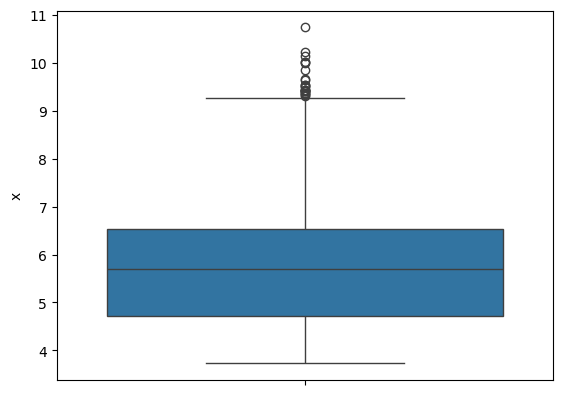

In [13]:
sns.boxplot(y=df['x'])
plt.show()

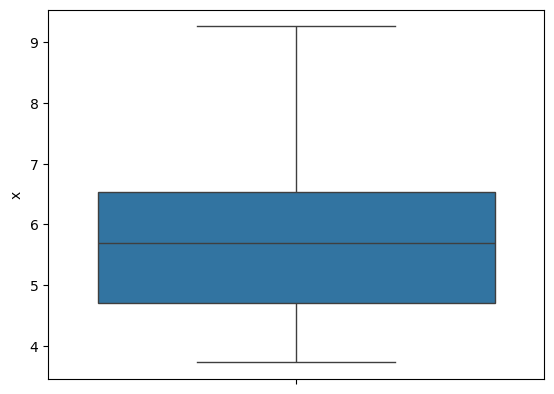

In [14]:
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['x'] > lower_bound) & (df['x'] < upper_bound)]

sns.boxplot(y=df['x'])
plt.show()

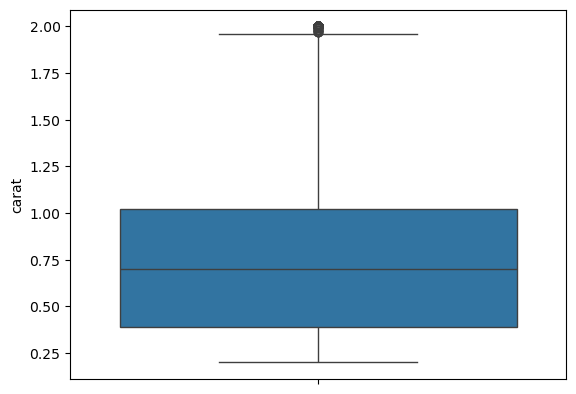

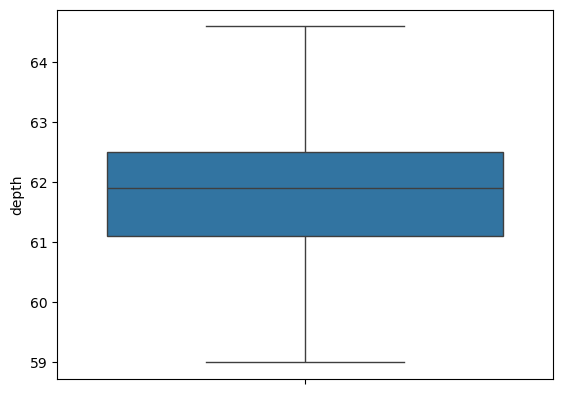

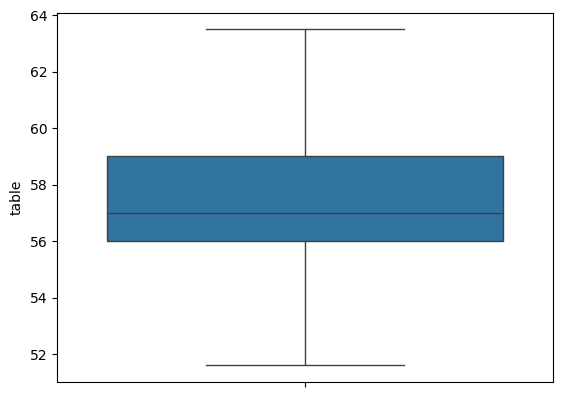

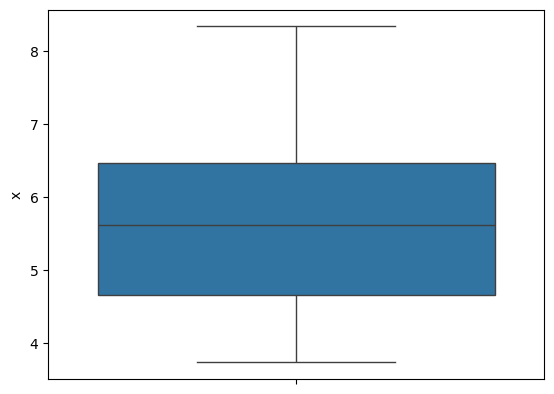

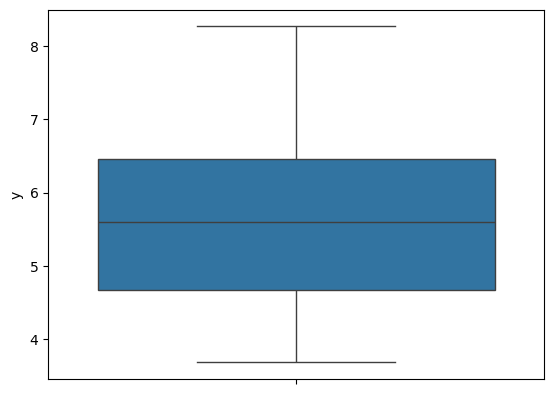

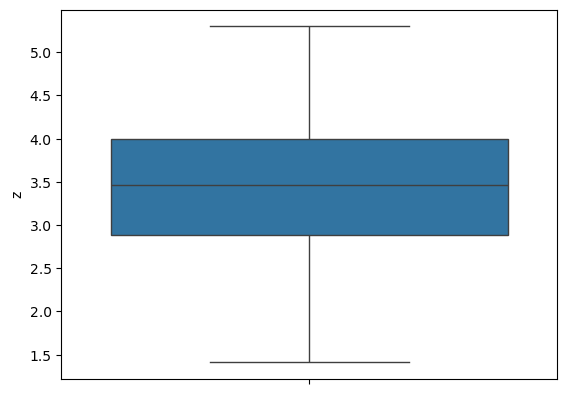

In [15]:
cols=['carat','depth','table','x','y','z']
for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    plt.figure()
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

    sns.boxplot(y=df[i])
    plt.show()

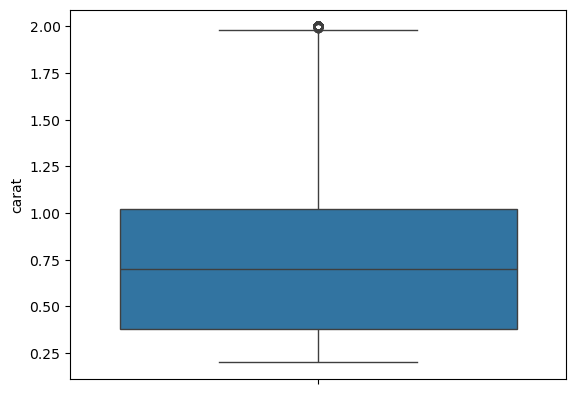

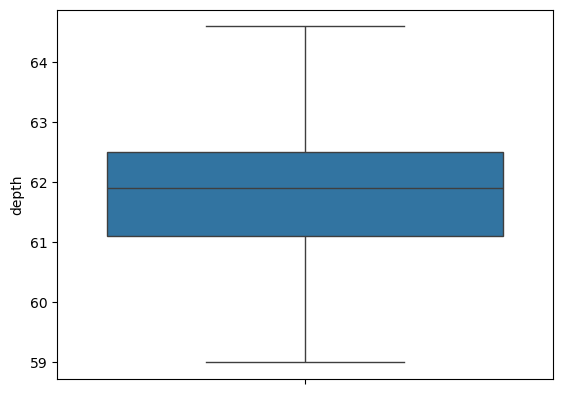

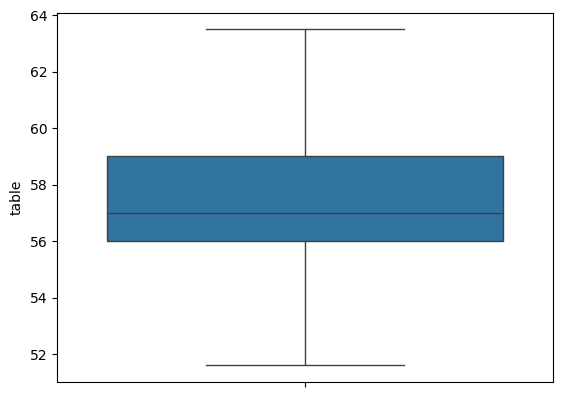

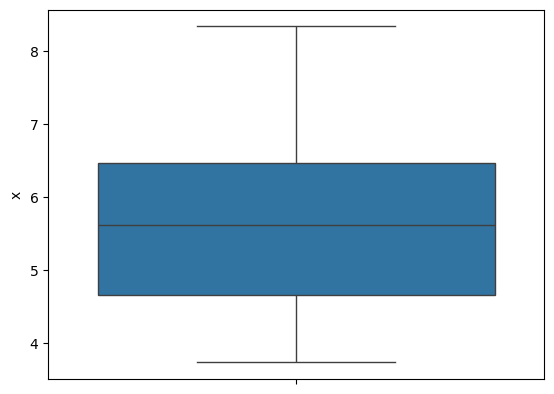

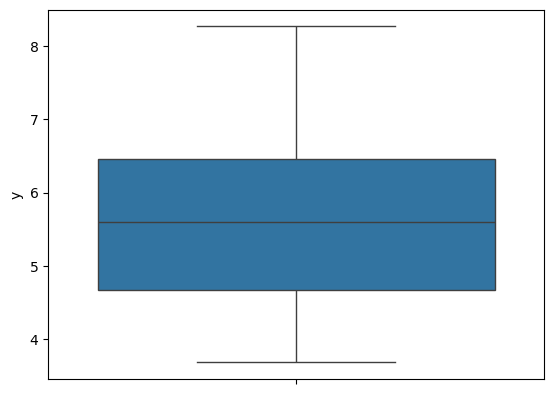

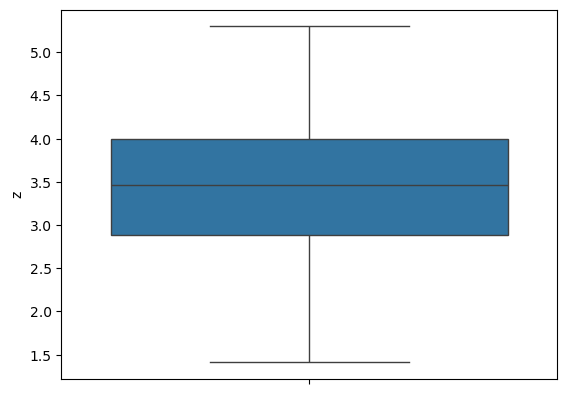

In [16]:
cols = ['carat','depth','table','x','y','z']

for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    plt.figure()
    sns.boxplot(y=df[i])
    plt.show()

In [17]:
numeric_cols = ['carat','depth','table','x','y','z']

outliers = {}  # dictionary to store outliers for each column

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower) | (df[col] > upper)]

# Print number of outliers for each column
for col in numeric_cols:
    print(f"{col}: {len(outliers[col])} outliers")

carat: 207 outliers
depth: 0 outliers
table: 0 outliers
x: 0 outliers
y: 0 outliers
z: 0 outliers


In [18]:
# Find IQR limits
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['carat'] >= lower) & (df['carat'] <= upper)]


In [19]:
# Check again after removing outliers
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_after = df[(df['carat'] < lower) | (df['carat'] > upper)]

print("Outliers remaining in carat:", len(outliers_after))


Outliers remaining in carat: 0


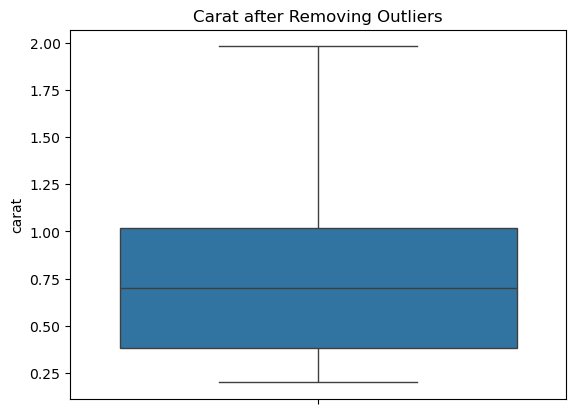

In [20]:
sns.boxplot(df['carat'])
plt.title("Carat after Removing Outliers")
plt.show()

In [21]:
# Checking for duplicate value

df.duplicated().sum()

np.int64(110)

In [22]:
# remove duplicate rows

df=df.drop_duplicates()

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
#show the rows and columns of dataset

df.shape 

(48581, 10)

# Data cleaning

In [25]:
# Treating null values

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
# There is no null values

# Encoding

In [27]:
df['cut']=df['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})

In [28]:
df['color']=df['color'].replace({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})

In [29]:
df['clarity']=df['clarity'].replace({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


# Finding the correlation

In [31]:
df['carat'].corr(df['cut'])

np.float64(-0.11030896279501766)

In [32]:
df.corr()  #correlation --> It shows that how two variables are linearly related.

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.110309,-0.229433,-0.309169,0.031086,0.178521,0.906526,0.986168,0.985504,0.985006
cut,-0.110309,1.000000,0.010467,0.163026,-0.281838,-0.407232,-0.042493,-0.094357,-0.098188,-0.123474
color,-0.229433,0.010467,1.000000,-0.056580,-0.043424,-0.016728,-0.091820,-0.213506,-0.213476,-0.216656
clarity,-0.309169,0.163026,-0.056580,1.000000,-0.072580,-0.152767,-0.073096,-0.330505,-0.325496,-0.333528
depth,0.031086,-0.281838,-0.043424,-0.072580,1.000000,-0.229252,-0.002956,-0.011624,-0.013398,0.085848
table,0.178521,-0.407232,-0.016728,-0.152767,-0.229252,1.000000,0.118510,0.179649,0.174406,0.154925
price,0.906526,-0.042493,-0.091820,-0.073096,-0.002956,0.118510,1.000000,0.873670,0.874969,0.870191
x,0.986168,-0.094357,-0.213506,-0.330505,-0.011624,0.179649,0.873670,1.000000,0.998623,0.994035
y,0.985504,-0.098188,-0.213476,-0.325496,-0.013398,0.174406,0.874969,0.998623,1.000000,0.993855
z,0.985006,-0.123474,-0.216656,-0.333528,0.085848,0.154925,0.870191,0.994035,0.993855,1.000000


# Histogram

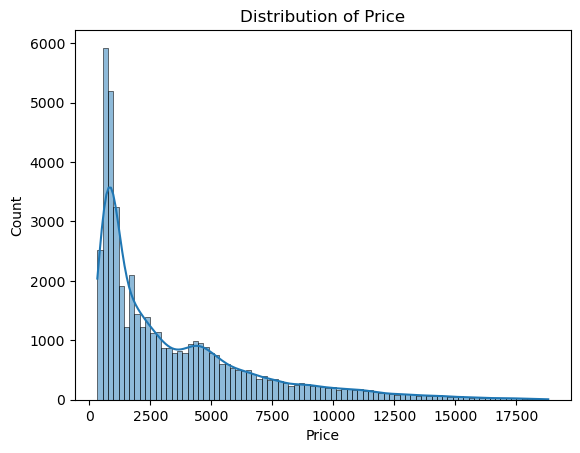

In [33]:
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.show()

# Pairplot

In [ ]:
sns.pairplot(df)
plt.show()

# Heatmap

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat,annot=True)
plt.show()

# Data modeling

In [ ]:
X= df.drop(["price"],axis =1).values
y= df["price"].values

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [ ]:
X_train

In [ ]:
X_test

# Feature Scaling To Get All Columns In Same Scale/Range

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

In [ ]:
X_train

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [70]:
reg.fit(X_train,y_train)

LinearRegression()

In [71]:
reg.coef_

array([ 5652.34260607,    71.08602505,   541.80017707,   754.13998014,
         -35.1451622 ,   -80.45438365, -2015.64029204,   700.84005728,
        -943.29393405])

In [72]:
reg.intercept_

np.float64(3471.3801461505336)

In [73]:
y_pred=reg.predict(X_test)

In [74]:
y_pred

array([1082.92224252, 4009.84330725,  697.81448487, ..., 1619.52587558,
       1863.81009455, -783.97563352])

# Evaluation

In [81]:
from sklearn import metrics

In [83]:
metrics.mean_squared_error(y_test,y_pred)

1066899.5762738117

In [77]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

np.float64(1032.9083097128282)

In [87]:
lr=metrics.r2_score(y_test,y_pred)

In [66]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


# k nearest neighbor

In [89]:
from sklearn.neighbors import KNeighborsRegressor
reg_all = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)

In [90]:
y_pred

array([ 734.125, 3941.25 ,  729.625, ...,  590.   ,  888.75 ,  468.25 ])

In [91]:
metrics.mean_squared_error(y_test,y_pred)

311263.6139738988

In [93]:
knn=metrics.r2_score(y_test,y_pred)

# Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [96]:
y_pred

array([ 560.5, 3716.6,  813.8, ...,  659.4,  633.4,  449.7])

In [97]:
metrics.mean_squared_error(y_test,y_pred)

203964.46621350382

In [98]:
rf=metrics.r2_score(y_test,y_pred)

# Create DataFrame to display accuracies

In [101]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import r2_score
accuracy_df = pd.DataFrame({
    'Model': ['Linear Regression','Random forest', 'KNN'],
    'Accuracy': [lr,rf,knn]
})

accuracy_df

,Model,Accuracy
0,Linear Regression,0.905458
1,Random forest,0.981926
2,KNN,0.972418


# Conclusion 